<h2 style="color:purple"><center><i><b>ADULT INCOME</b></i></center></h2>

<h2 style = "color:black"><center><i><b>Business Problem</b></center></h2>

__Abstract:__ *Predict whether income exceeds $50K/yr based on census data. Also known as "Census Income" dataset.*

*We can build neural networks for the machine learning data*

*Upto data pre-processing steps in machine learning , we can follow the same for neural networks*

*The only change will be model building*

*Taking Adult Income dataset for the analysis*

__Variables:__

*1. Age*

*2. Workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.*

*3. Fnlwgt: sampling weight*

*4. Education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate,5th-6th, Preschool.*

*5. Education-num: education achieved in numerical form.*

*6. Marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.*

*7. Occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.*

*8. Relationship: Current relationship : Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.*

*9. Race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.*

*10. Sex: Female, Male.*

*11. Capital-gain: Income from investment sources other than wage/salary.*

*12. Capital-loss: Income from investment sources other than wage/salary.*

*13. Hours-per-week: No of Working Hours per week*

*14. Native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece,South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos,Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru,Hong, Holand-Netherlands.*

*15. Income : >50K, <=50K*

*Here we have 14 Input Variables and 1 output variable(Income)*

__Loding the Libraries__

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings("ignore")

__Data Loding__

In [3]:
data = pd.read_csv(r"C:\DataSets\adult.csv")
data

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [4]:
data.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


__Data Wrangling__

In [5]:
data.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [6]:
data.shape

(48842, 15)

__Renaming Column Index__

In [7]:
data.rename(columns = {"educational-num":"educationalnum","capital-gain":"capitalgain","capital-loss":"capitalloss","hours-per-week":"hoursperweek"},inplace = True)

In [8]:
data.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'educationalnum',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capitalgain', 'capitalloss', 'hoursperweek', 'native-country',
       'income'],
      dtype='object')

__Checking Null values__

In [9]:
data.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
educationalnum    0
marital-status    0
occupation        0
relationship      0
race              0
gender            0
capitalgain       0
capitalloss       0
hoursperweek      0
native-country    0
income            0
dtype: int64

*In this data we have missing values as special charcaters ?, replacing them with nan*

In [10]:
# Replacing ? with missing values
data.replace("?",np.nan,inplace=True)

*Missing values present in Columns Workclass, Occupation, Native Country*

*To replace them we need to lookup column type*

In [11]:
data.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
educationalnum     int64
marital-status    object
occupation        object
relationship      object
race              object
gender            object
capitalgain        int64
capitalloss        int64
hoursperweek       int64
native-country    object
income            object
dtype: object

*Missing values columns are Categorical , so we can replace them with mode or any other value based on analysis*

__Checking Shape Of the Data before deleting duplicates__

In [12]:
data.shape

(48842, 15)

In [13]:
# Replacing missing values with one single loop for both numarical and categorical
for i in data.columns:
    if data[i].dtype == 'object':
        modevalue = data[i].mode()[0]
        data[i].fillna(modevalue, inplace = True)
    elif data[i].dtype == 'int32' or 'int64' or 'float64':
        data[i].fillna(data[i].median(), inplace = True)

__EDA / Data Understanding__

*In this we are going to analyze which input variables are important to output variable and will be taken to modeling.
Understanding each column along with output column to get some insights on Data*


*Check Notes:*

*1. Age, Workclass, Education, Occupation, Hours Per week, Race, .... will effect Income or not*

*2. Checking b/w Education and Education_Num, MaritalStatus and Relationship, Workclass and Occupation*

*3. Correlations*

In [14]:
var = data.duplicated().sum()
var

53

In [15]:
# Droping Duplicated Rows
data = data.drop_duplicates(ignore_index = True)

__Checking Shape Of the Data after deleting duplicates__

In [16]:
data.shape

(48789, 15)

__Descriptive Analysis__

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48789 entries, 0 to 48788
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48789 non-null  int64 
 1   workclass       48789 non-null  object
 2   fnlwgt          48789 non-null  int64 
 3   education       48789 non-null  object
 4   educationalnum  48789 non-null  int64 
 5   marital-status  48789 non-null  object
 6   occupation      48789 non-null  object
 7   relationship    48789 non-null  object
 8   race            48789 non-null  object
 9   gender          48789 non-null  object
 10  capitalgain     48789 non-null  int64 
 11  capitalloss     48789 non-null  int64 
 12  hoursperweek    48789 non-null  int64 
 13  native-country  48789 non-null  object
 14  income          48789 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [18]:
data.describe().T.style.set_properties(**{'background-color': 'gray','color': 'black','border-color': 'black'})

,count,mean,std,min,25%,50%,75%,max
age,48789.000000,38.653139,13.708426,17.000000,28.000000,37.000000,48.000000,90.000000
fnlwgt,48789.000000,189669.662157,105618.212169,12285.000000,117555.000000,178140.000000,237608.000000,1490400.000000
educationalnum,48789.000000,10.078809,2.570072,1.000000,9.000000,10.000000,12.000000,16.000000
capitalgain,48789.000000,1080.239829,7455.980728,0.000000,0.000000,0.000000,0.000000,99999.000000
capitalloss,48789.000000,87.597368,403.213066,0.000000,0.000000,0.000000,0.000000,4356.000000
hoursperweek,48789.000000,40.425895,12.392856,1.000000,40.000000,40.000000,45.000000,99.000000


__Feature Engineering__

__Dealing Outliers__

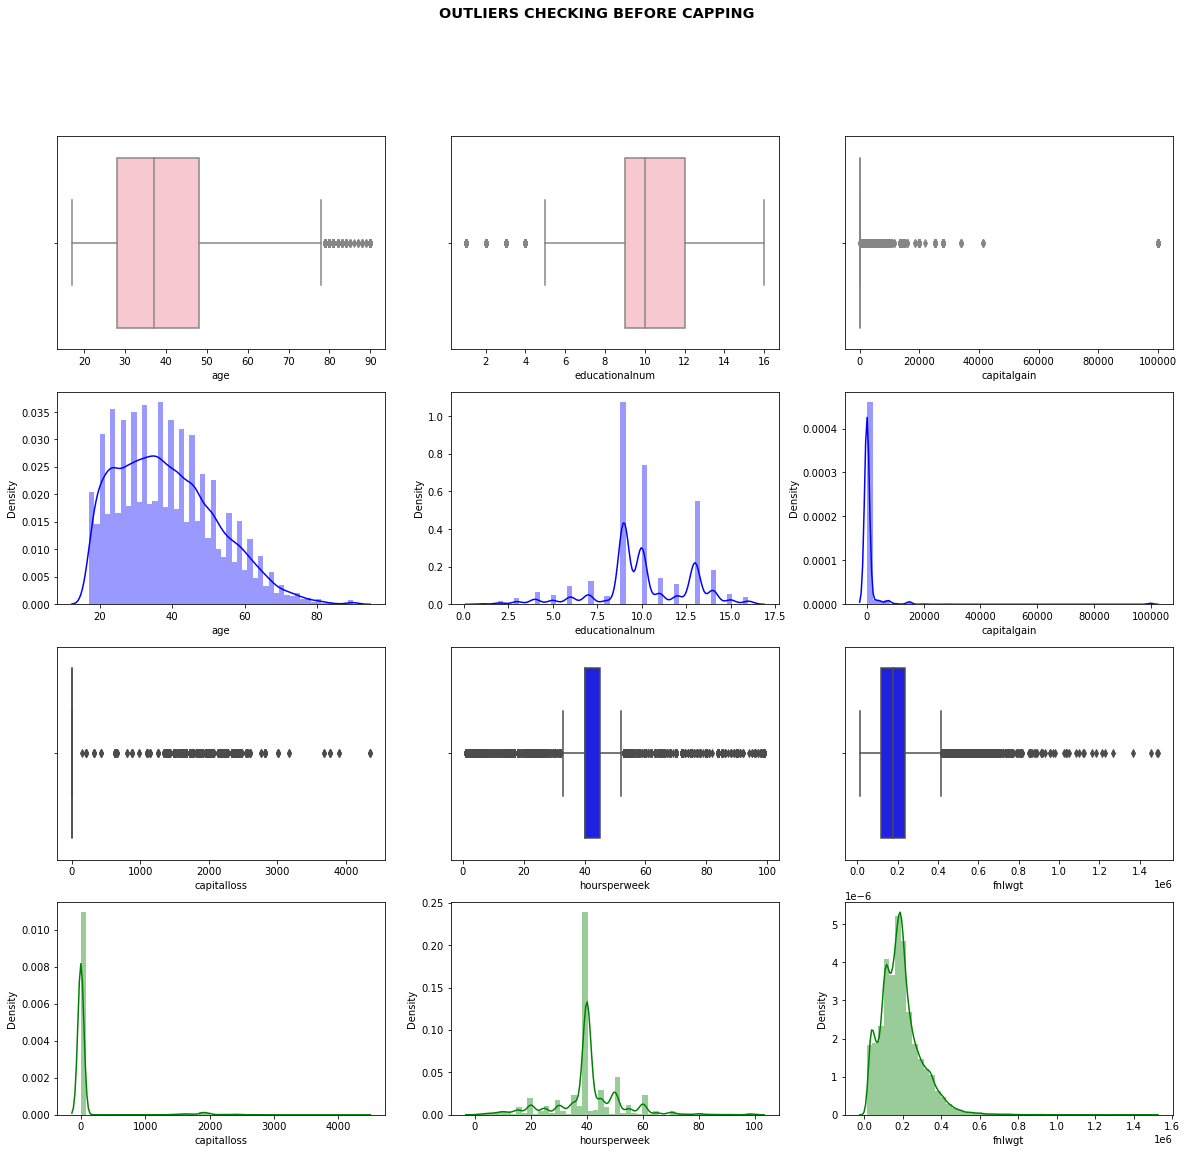

In [19]:
plt.figure(figsize = (20,18))
plt.suptitle("OUTLIERS CHECKING BEFORE CAPPING",fontsize = 'x-large',weight = 'extra bold',ha = "center")
plt.subplot(4,3,1)
sns.boxplot(data["age"],color = "pink")
plt.subplot(4,3,4)
sns.distplot(data["age"],color = "blue")
plt.subplot(4,3,2)
sns.boxplot(data["educationalnum"], color = "pink")
plt.subplot(4,3,5)
sns.distplot(data["educationalnum"], color = "blue")
plt.subplot(4,3,3)
sns.boxplot(data["capitalgain"],color = "pink")
plt.subplot(4,3,6)
sns.distplot(data["capitalgain"], color = 'blue')
plt.subplot(4,3,7)
sns.boxplot(data["capitalloss"],color = "blue")
plt.subplot(4,3,10)
sns.distplot(data["capitalloss"], color = 'green')
plt.subplot(4,3,8)
sns.boxplot(data["hoursperweek"],color = "blue")
plt.subplot(4,3,11)
sns.distplot(data["hoursperweek"], color = 'green')
plt.subplot(4,3,9)
sns.boxplot(data["fnlwgt"],color = "blue")
plt.subplot(4,3,12)
sns.distplot(data["fnlwgt"], color = 'green')
plt.show()

__OUTLIERS CAPPING WITH IQR METHOD__

In [20]:
def outliers(data, feature):
    Q1= data[feature].quantile(0.25)
    Q3 = data[feature].quantile(0.75)
    IQR = Q3 - Q1
    upper_limit = Q3 + 1.5 * IQR
    lower_limit = Q1 - 1.5 * IQR
    return upper_limit, lower_limit

upper, lower = outliers(data, "age")
print("Upper whisker: ", upper)
print("Lower Whisker: ", lower)

Upper whisker:  78.0
Lower Whisker:  -2.0


In [21]:
data["age"] = np.where(data["age"] > upper, upper,
              np.where(data["age"] < lower, lower,
                       data["age"]))

In [22]:
upper, lower = outliers(data, "educationalnum")
print("Upper whisker: ", upper)
print("Lower Whisker: ", lower)

Upper whisker:  16.5
Lower Whisker:  4.5


In [23]:
data["educationalnum"] = np.where(data["educationalnum"] > upper, upper,
                          np.where(data["educationalnum"] < lower, lower,
                                   data["educationalnum"]))

In [24]:
upper, lower = outliers(data, "capitalgain")
print("Upper whisker: ", upper)
print("Lower Whisker: ", lower)

Upper whisker:  0.0
Lower Whisker:  0.0


In [25]:
data["capitalgain"] = np.where(data["capitalgain"] > upper, upper,
                       np.where(data["capitalgain"] < lower, lower,
                                data["capitalgain"]))

In [26]:
upper, lower = outliers(data, "capitalloss")
print("Upper whisker: ", upper)
print("Lower Whisker: ", lower)

Upper whisker:  0.0
Lower Whisker:  0.0


In [27]:
data["capitalloss"] = np.where(data["capitalloss"] > upper, upper,
                       np.where(data["capitalloss"] < lower, lower,
                                data["capitalloss"]))

In [28]:
upper, lower = outliers(data, "hoursperweek")
print("Upper whisker: ", upper)
print("Lower Whisker: ", lower)

Upper whisker:  52.5
Lower Whisker:  32.5


In [29]:
data["hoursperweek"] = np.where(data["hoursperweek"] > upper, upper,
                         np.where(data["hoursperweek"] < lower, lower,
                                  data["hoursperweek"]))

In [30]:
upper, lower = outliers(data, "fnlwgt")
print("Upper whisker: ", upper)
print("Lower Whisker: ", lower)

Upper whisker:  417687.5
Lower Whisker:  -62524.5


In [31]:
data["fnlwgt"] = np.where(data["fnlwgt"] > upper, upper,
                 np.where(data["fnlwgt"] < lower, lower,
                          data["fnlwgt"]))

__AFETR CAPPING OUTLIERS__

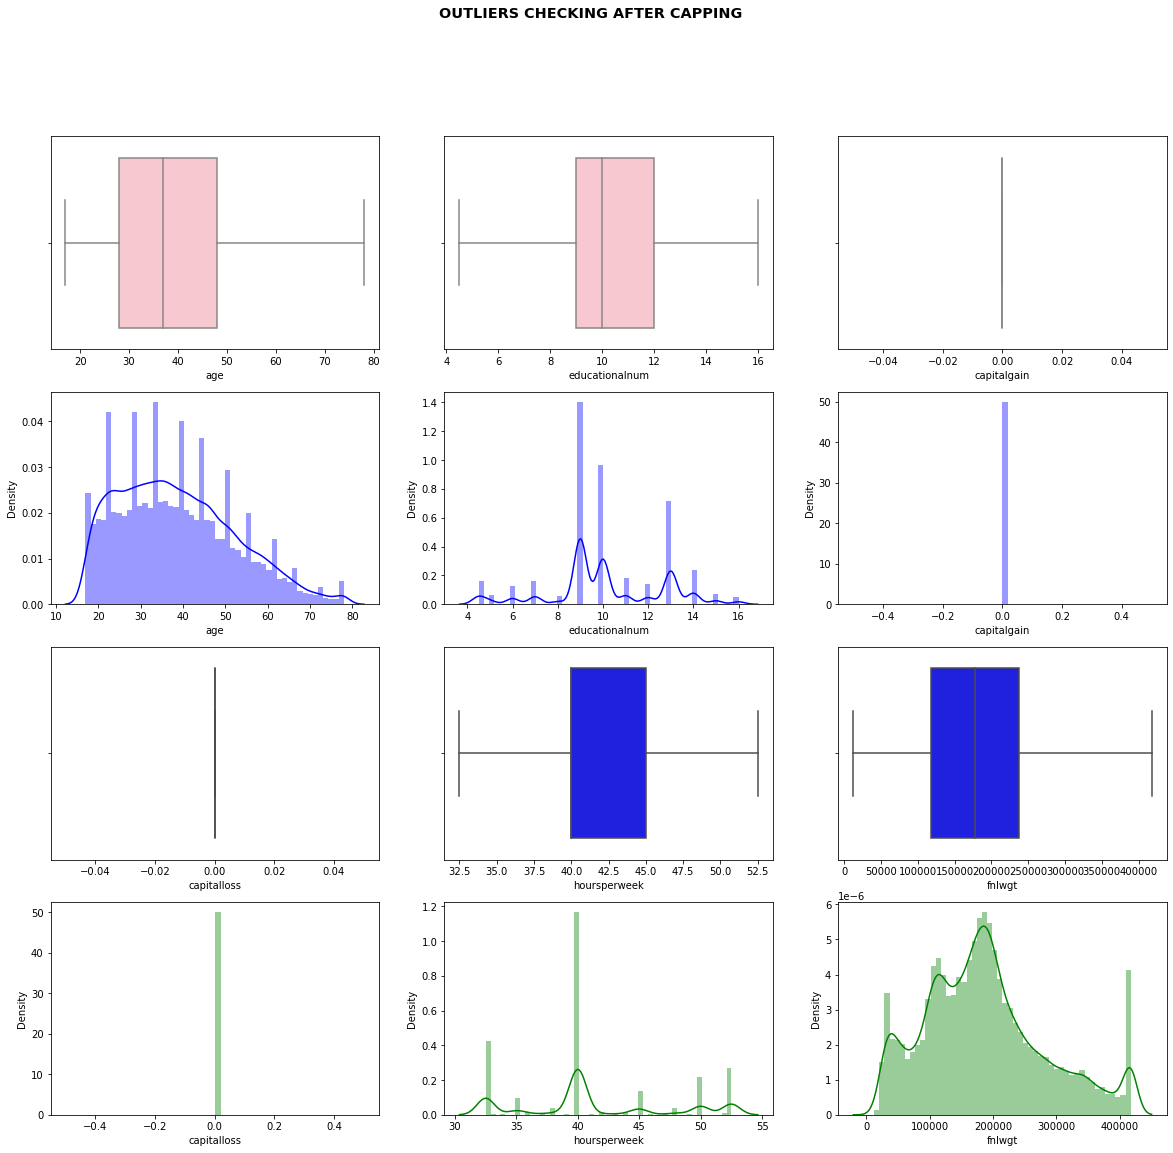

In [32]:
plt.figure(figsize = (20,18))
plt.suptitle("OUTLIERS CHECKING AFTER CAPPING",fontsize = 'x-large',weight = 'extra bold',ha = "center")
plt.subplot(4,3,1)
sns.boxplot(data["age"],color = "pink")
plt.subplot(4,3,4)
sns.distplot(data["age"],color = "blue")
plt.subplot(4,3,2)
sns.boxplot(data["educationalnum"], color = "pink")
plt.subplot(4,3,5)
sns.distplot(data["educationalnum"], color = "blue")
plt.subplot(4,3,3)
sns.boxplot(data["capitalgain"],color = "pink")
plt.subplot(4,3,6)
sns.distplot(data["capitalgain"], color = 'blue')
plt.subplot(4,3,7)
sns.boxplot(data["capitalloss"],color = "blue")
plt.subplot(4,3,10)
sns.distplot(data["capitalloss"], color = 'green')
plt.subplot(4,3,8)
sns.boxplot(data["hoursperweek"],color = "blue")
plt.subplot(4,3,11)
sns.distplot(data["hoursperweek"], color = 'green')
plt.subplot(4,3,9)
sns.boxplot(data["fnlwgt"],color = "blue")
plt.subplot(4,3,12)
sns.distplot(data["fnlwgt"], color = 'green')
plt.show()

In [33]:
adult = data.to_csv("data.csv")

In [34]:
# TO SEPERATE THE CATEGORICAL COLUMNS FROMM DATA FRAME
catcolumns = data.select_dtypes(include=['object'])

In [35]:
catcolumns.head(2)

,workclass,education,marital-status,occupation,relationship,race,gender,native-country,income
0,Private,11th,Never-married,Machine-op-inspct,Own-child,Black,Male,United-States,<=50K
1,Private,HS-grad,Married-civ-spouse,Farming-fishing,Husband,White,Male,United-States,<=50K


In [36]:
y = catcolumns.iloc[:,-1]

In [37]:
catcolumns = catcolumns.drop("income", axis =1)

In [38]:
numcolumns = data.select_dtypes(include=['int', 'float64'])

In [39]:
numcolumns = numcolumns.drop("educationalnum", axis =1)

# here i am dropping educational_number , because it is ranking representation of "education" feature.

In [40]:
numcolumns.head(2)

,age,fnlwgt,capitalgain,capitalloss,hoursperweek
0,25.0,226802.0,0.0,0.0,40.0
1,38.0,89814.0,0.0,0.0,50.0


__ONE HOT ENCODING OF CATEGORICAL DATA__

In [41]:
from sklearn.preprocessing import OneHotEncoder

In [42]:
ohe = OneHotEncoder(categories='auto', drop=None, sparse=False, dtype= 'float64')

In [43]:
catcolumns = ohe.fit_transform(catcolumns)

In [44]:
c = ohe.get_feature_names()
c

array(['x0_Federal-gov', 'x0_Local-gov', 'x0_Never-worked', 'x0_Private',
       'x0_Self-emp-inc', 'x0_Self-emp-not-inc', 'x0_State-gov',
       'x0_Without-pay', 'x1_10th', 'x1_11th', 'x1_12th', 'x1_1st-4th',
       'x1_5th-6th', 'x1_7th-8th', 'x1_9th', 'x1_Assoc-acdm',
       'x1_Assoc-voc', 'x1_Bachelors', 'x1_Doctorate', 'x1_HS-grad',
       'x1_Masters', 'x1_Preschool', 'x1_Prof-school', 'x1_Some-college',
       'x2_Divorced', 'x2_Married-AF-spouse', 'x2_Married-civ-spouse',
       'x2_Married-spouse-absent', 'x2_Never-married', 'x2_Separated',
       'x2_Widowed', 'x3_Adm-clerical', 'x3_Armed-Forces',
       'x3_Craft-repair', 'x3_Exec-managerial', 'x3_Farming-fishing',
       'x3_Handlers-cleaners', 'x3_Machine-op-inspct', 'x3_Other-service',
       'x3_Priv-house-serv', 'x3_Prof-specialty', 'x3_Protective-serv',
       'x3_Sales', 'x3_Tech-support', 'x3_Transport-moving', 'x4_Husband',
       'x4_Not-in-family', 'x4_Other-relative', 'x4_Own-child',
       'x4_Unmarried', 'x4_

In [45]:
catdata = pd.DataFrame(catcolumns, columns = c)

In [46]:
catdata

,x0_Federal-gov,x0_Local-gov,x0_Never-worked,x0_Private,x0_Self-emp-inc,x0_Self-emp-not-inc,x0_State-gov,x0_Without-pay,x1_10th,x1_11th,...,x7_Portugal,x7_Puerto-Rico,x7_Scotland,x7_South,x7_Taiwan,x7_Thailand,x7_Trinadad&Tobago,x7_United-States,x7_Vietnam,x7_Yugoslavia
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48784,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
48785,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
48786,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
48787,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [47]:
numcolumns.reset_index(inplace=True,drop='first')

In [48]:
catdata.reset_index(inplace=True,drop='first')

In [49]:
ohe_df = pd.concat([numcolumns,catdata], axis=1)

In [50]:
ohe_df

,age,fnlwgt,capitalgain,capitalloss,hoursperweek,x0_Federal-gov,x0_Local-gov,x0_Never-worked,x0_Private,x0_Self-emp-inc,...,x7_Portugal,x7_Puerto-Rico,x7_Scotland,x7_South,x7_Taiwan,x7_Thailand,x7_Trinadad&Tobago,x7_United-States,x7_Vietnam,x7_Yugoslavia
0,25.0,226802.0,0.0,0.0,40.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,38.0,89814.0,0.0,0.0,50.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,28.0,336951.0,0.0,0.0,40.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,44.0,160323.0,0.0,0.0,40.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,18.0,103497.0,0.0,0.0,32.5,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48784,27.0,257302.0,0.0,0.0,38.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
48785,40.0,154374.0,0.0,0.0,40.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
48786,58.0,151910.0,0.0,0.0,40.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
48787,22.0,201490.0,0.0,0.0,32.5,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


__Visual Analysis of Data__

In [51]:
data['income'].value_counts()

<=50K    37108
>50K     11681
Name: income, dtype: int64

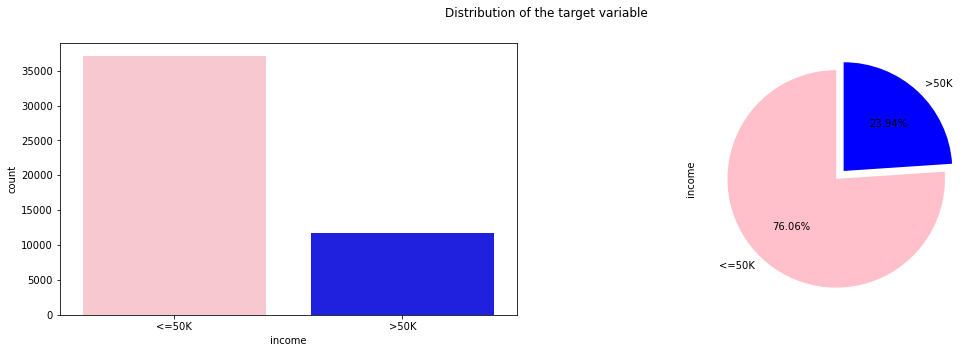

In [52]:
plt.figure(figsize=(18,5))
plt.subplot(1,2,1)
sns.countplot(x=data['income'], palette=['pink','blue'])
plt.subplot(1,2,2)
data['income'].value_counts().plot(kind='pie', autopct='%.2f%%', explode=[0,0.1], startangle=90, colors=['pink','blue'],labels = ['<=50K','>50K'])
plt.suptitle('Distribution of the target variable')
plt.show()

*Cleaarly The dataset is imbalanced.So that, I used SMOTE technique for Balance the dataset.*

In [53]:
from imblearn.over_sampling import  SMOTE

In [54]:
smt = SMOTE()

In [55]:
ohe_df, y =  smt.fit_resample(ohe_df, y)

In [56]:
ohe_df.shape, y.shape

((74216, 104), (74216,))

In [57]:
adult_ohe_df = ohe_df.to_csv("ohe_df_ adult.csv")

In [58]:
adult_y = y.to_csv("y_adult.csv")

__Feature Scaling__

In [59]:
from sklearn.preprocessing import MinMaxScaler
scale = MinMaxScaler()

In [60]:
ohe_df["age"] = scale.fit_transform(np.array(ohe_df["age"]).reshape(-1,1))

In [61]:
ohe_df["fnlwgt"] = scale.fit_transform(np.array(ohe_df["fnlwgt"]).reshape(-1,1))

In [62]:
ohe_df["hoursperweek"] = scale.fit_transform(np.array(ohe_df["hoursperweek"]).reshape(-1,1))

In [63]:
ohe_df

,age,fnlwgt,capitalgain,capitalloss,hoursperweek,x0_Federal-gov,x0_Local-gov,x0_Never-worked,x0_Private,x0_Self-emp-inc,...,x7_Portugal,x7_Puerto-Rico,x7_Scotland,x7_South,x7_Taiwan,x7_Thailand,x7_Trinadad&Tobago,x7_United-States,x7_Vietnam,x7_Yugoslavia
0,0.131148,0.529146,0.0,0.0,0.375000,0.000000,0.000000,0.0,1.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.344262,0.191240,0.0,0.0,0.875000,0.000000,0.000000,0.0,1.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.180328,0.800849,0.0,0.0,0.375000,0.000000,1.000000,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.442623,0.365163,0.0,0.0,0.375000,0.000000,0.000000,0.0,1.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.016393,0.224991,0.0,0.0,0.000000,0.000000,0.000000,0.0,1.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74211,0.395027,0.165868,0.0,0.0,1.000000,0.000000,0.000000,0.0,0.725839,0.274161,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
74212,0.144656,0.555145,0.0,0.0,0.375000,0.000000,0.070154,0.0,0.929846,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
74213,0.477310,0.831114,0.0,0.0,0.403978,0.884088,0.000000,0.0,0.115912,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
74214,0.552724,0.652596,0.0,0.0,0.484799,0.824321,0.000000,0.0,0.175679,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [64]:
y = np.where(y == '<=50K',0,1)
y

array([0, 0, 1, ..., 1, 1, 1])

__Train_Test_Split:__

In [65]:
from sklearn.model_selection import train_test_split

In [66]:
x_train,x_test,y_train,y_test = train_test_split(ohe_df,y,random_state=44,shuffle = True,test_size=0.30)

In [67]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((51951, 104), (22265, 104), (51951,), (22265,))

__Model Building__

In [68]:
pip install keras

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [69]:
import keras
from keras import Sequential
from tensorflow.keras.models import Sequential
from keras.layers.normalization import layer_normalization
from keras.layers import Dense

In [70]:
ann = Sequential()
ann.add(Dense(units = 104, kernel_initializer = "random_uniform", activation = "relu", input_dim = x_train.shape[1]))
ann.add(Dense(units = 52, kernel_initializer = "random_uniform", activation = "relu"))
ann.add(Dense(units = 26, kernel_initializer = "random_uniform", activation = "relu"))
ann.add(Dense(units = 13, kernel_initializer = "random_uniform", activation = "relu"))
ann.add(Dense(units = 7, kernel_initializer = "random_uniform", activation = "relu"))
ann.add(Dense(units = 4, kernel_initializer = "random_uniform", activation = "relu"))
ann.add(Dense(units = 2, kernel_initializer = "random_uniform", activation = "relu"))
ann.add(Dense(units = 1, kernel_initializer = "random_uniform", activation = "sigmoid"))

In [71]:
ann.compile(loss = ['binary_crossentropy'], optimizer = "adam", metrics =["accuracy"])

In [72]:
ann.summary() 

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 104)               10920     
                                                                 
 dense_1 (Dense)             (None, 52)                5460      
                                                                 
 dense_2 (Dense)             (None, 26)                1378      
                                                                 
 dense_3 (Dense)             (None, 13)                351       
                                                                 
 dense_4 (Dense)             (None, 7)                 98        
                                                                 
 dense_5 (Dense)             (None, 4)                 32        
                                                                 
 dense_6 (Dense)             (None, 2)                 1

In [73]:
ann.fit(x_train, y_train, validation_data = (x_test, y_test), epochs = 200, batch_size = 700)

Epoch 1/200
75/75 [==============================] - 2s 10ms/step - loss: 0.6932 - accuracy: 0.4990 - val_loss: 0.6932 - val_accuracy: 0.4968
Epoch 2/200
75/75 [==============================] - 0s 6ms/step - loss: 0.6932 - accuracy: 0.4978 - val_loss: 0.6932 - val_accuracy: 0.4968
Epoch 3/200
75/75 [==============================] - 0s 6ms/step - loss: 0.6932 - accuracy: 0.5014 - val_loss: 0.6932 - val_accuracy: 0.4968
Epoch 4/200
75/75 [==============================] - 0s 6ms/step - loss: 0.6932 - accuracy: 0.5014 - val_loss: 0.6932 - val_accuracy: 0.4968
Epoch 5/200
75/75 [==============================] - 0s 5ms/step - loss: 0.6932 - accuracy: 0.4996 - val_loss: 0.6932 - val_accuracy: 0.4968
Epoch 6/200
75/75 [==============================] - 0s 6ms/step - loss: 0.6931 - accuracy: 0.5014 - val_loss: 0.6932 - val_accuracy: 0.4968
Epoch 7/200
75/75 [==============================] - 0s 6ms/step - loss: 0.6932 - accuracy: 0.4973 - val_loss: 0.6932 - val_accuracy: 0.4968
Epoch 8/200


In [74]:
ann.history.history

{'loss': [0.6931554079055786,
  0.6931518316268921,
  0.6931506991386414,
  0.6931515336036682,
  0.6931541562080383,
  0.693148672580719,
  0.6931538581848145,
  0.6931501030921936,
  0.6931488513946533,
  0.6931467652320862,
  0.6931488513946533,
  0.6931518316268921,
  0.693147599697113,
  0.6931490898132324,
  0.6931588649749756,
  0.6931524872779846,
  0.6931504011154175,
  0.6931483745574951,
  0.6931508183479309,
  0.6931484937667847,
  0.6931480765342712,
  0.6931559443473816,
  0.6931479573249817,
  0.6931459307670593,
  0.693148672580719,
  0.6931552886962891,
  0.6931489706039429,
  0.6931490898132324,
  0.6931508183479309,
  0.6931531429290771,
  0.6931527853012085,
  0.6931504607200623,
  0.6931539177894592,
  0.693146824836731,
  0.6931515336036682,
  0.693150520324707,
  0.6931509375572205,
  0.693150520324707,
  0.6931545734405518,
  0.6931478381156921,
  0.693152129650116,
  0.6931499242782593,
  0.6931527256965637,
  0.6931472420692444,
  0.6931477785110474,
  0.69315

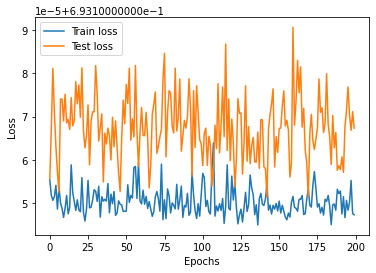

In [75]:
import matplotlib.pyplot as plt
plt.plot(list(range(0,200)), ann.history.history['loss'], label = "Train loss")
plt.plot(list(range(0,200)), ann.history.history['val_loss'], label = "Test loss")
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

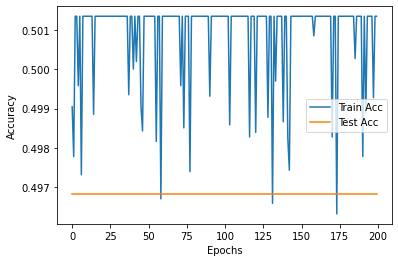

In [76]:
plt.plot(list(range(0,200)), ann.history.history['accuracy'], label = "Train Acc")
plt.plot(list(range(0,200)), ann.history.history['val_accuracy'], label = "Test Acc")
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.show()

In [77]:
y_probs = ann.predict(x_test)
y_probs

696/696 [==============================] - 1s 1ms/step


array([[0.4986854],
       [0.4986854],
       [0.4986854],
       ...,
       [0.4986854],
       [0.4986854],
       [0.4986854]], dtype=float32)

In [78]:
y_pred = np.where(y_probs>0.5,1,0)
y_pred

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [79]:
from sklearn.metrics import confusion_matrix, classification_report

In [80]:
confusion_matrix(y_pred, y_test)

array([[11062, 11203],
       [    0,     0]], dtype=int64)

In [81]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       1.00      0.50      0.66     22265
           1       0.00      0.00      0.00         0

    accuracy                           0.50     22265
   macro avg       0.50      0.25      0.33     22265
weighted avg       1.00      0.50      0.66     22265

